In [1]:
import mne
import numpy as np
import pandas as pd
import pylab as plt
from glob import glob

# For parallel processing
import multiprocessing as mp
n_cpus = mp.cpu_count()

# For custom codebase
import sys
sys.path.insert(0, 'C:\\Users\\esolo\\Documents\\Python Scripts\\lib')

In [46]:
%matplotlib widget
from mne.filter import filter_data
from copy import copy

# Set some params
root = 'D:/'
sub = '477'
sess = 'Parietal'
fs = 500 #for all of the downsampled data, sampling rate is 500Hz

# Load the data
dirs = glob(root+str(sub)+'/*/')        
fname = root+str(sub)+'/complete_epo.fif'
epochs = mne.read_epochs(fname, preload=True, verbose=False) 
elecs = pd.read_pickle(dirs[0]+'contacts.pkl')   

epochs_t = epochs['target=="'+sess+'"']
tms_orig = epochs_t['tms'].get_data(); sham_orig = epochs_t['sham'].get_data()
tms_dat = filter_data(epochs_t['tms'].get_data(), fs, l_freq=1, h_freq=35, verbose=False)
sham_dat = filter_data(epochs_t['sham'].get_data(), fs, l_freq=1, h_freq=35, verbose=False)

### Plot the ERP ###
from codebase import normalize_prestim
from scipy.stats import sem

# Normalize values relative to the pre-stim interval
tms_norm = normalize_prestim(tms_dat, samples=250); tms_norm_orig = normalize_prestim(tms_orig, samples=250)
sham_norm = normalize_prestim(sham_dat, samples=250); sham_norm_orig = normalize_prestim(sham_orig, samples=250)

# Get the ERPs and SEMs
sep_tms_mu = np.mean(tms_norm, 0)
sep_sham_mu = np.mean(sham_norm, 0)
sep_tms_sem = sem(tms_norm, axis=0)
sep_sham_sem = sem(sham_norm, axis=0)

C:\Users\esolo\AppData\Local\Temp\ipykernel_18940\1905430146.py:19: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  tms_dat = filter_data(epochs_t['tms'].get_data(), fs, l_freq=1, h_freq=35, verbose=False)
C:\Users\esolo\AppData\Local\Temp\ipykernel_18940\1905430146.py:20: RuntimeWarning: filter_length (1651) is longer than the signal (1251), distortion is likely. Reduce filter length or filter a longer signal.
  sham_dat = filter_data(epochs_t['sham'].get_data(), fs, l_freq=1, h_freq=35, verbose=False)


In [49]:
np.where(np.array(elecs['Channel'])=='LFPx113-LFPx114')[0][0]

132

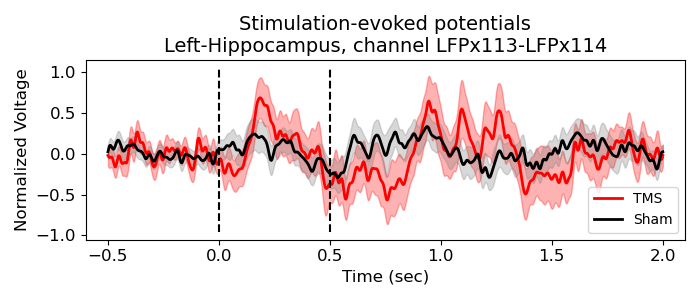

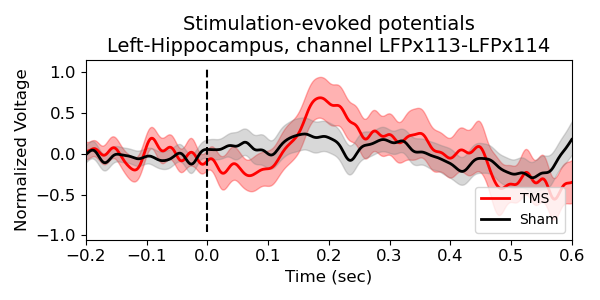

In [47]:
e = 132 # electrode in question

# Plot results
plt.figure(figsize=(7, 3)); ax=plt.subplot(111)
X = (np.arange(sep_tms_mu[e, :].size)/fs)-0.5
plt.fill_between(x = X, y1=sep_tms_mu[e, :]-sep_tms_sem[e, :], 
                 y2 = sep_tms_mu[e, :]+sep_tms_sem[e, :], color='red', alpha=0.3)  #plot the error bars
plt.fill_between(x = X, y1=sep_sham_mu[e, :]-sep_sham_sem[e, :], 
                 y2 = sep_sham_mu[e, :]+sep_sham_sem[e, :], color='gray', alpha=0.3)
plt.plot(X, sep_tms_mu[e, :], color='r', linewidth=2, label='TMS');
plt.plot(X, sep_sham_mu[e, :], color='k', linewidth=2, label='Sham');
plt.vlines([0.0, 0.5], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xlim(-0.6,2.1); 
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Normalized Voltage', fontsize=12);
plt.xlabel('Time (sec)', fontsize=12)
plt.legend(loc=4)
plt.title('Stimulation-evoked potentials\n'+elecs.iloc[e]['DKT_label']+', channel '+str(elecs['Channel'].iloc[e]), fontsize=14);
plt.tight_layout()

# Focus on the ERP interval
plt.figure(figsize=(6, 3)); ax=plt.subplot(111)
X = (np.arange(sep_tms_mu[e, :].size)/fs)-0.5
plt.fill_between(x = X, y1=sep_tms_mu[e, :]-sep_tms_sem[e, :], 
                 y2 = sep_tms_mu[e, :]+sep_tms_sem[e, :], color='red', alpha=0.3)  #plot the error bars
plt.fill_between(x = X, y1=sep_sham_mu[e, :]-sep_sham_sem[e, :], 
                 y2 = sep_sham_mu[e, :]+sep_sham_sem[e, :], color='gray', alpha=0.3)
plt.plot(X, sep_tms_mu[e, :], color='r', linewidth=2, label='TMS');
plt.plot(X, sep_sham_mu[e, :], color='k', linewidth=2, label='Sham');
plt.vlines([0.0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xlim(-0.2,0.6); 
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Normalized Voltage', fontsize=12);
plt.xlabel('Time (sec)', fontsize=12)
plt.legend(loc=4)
plt.title('Stimulation-evoked potentials\n'+elecs.iloc[e]['DKT_label']+', channel '+str(elecs['Channel'].iloc[e]), fontsize=14);
plt.tight_layout()

In [27]:
plt.close('all')

**Reasonable theta waveforms**
- Sub 538, DLPFC stim, elec 13 (LFPx21-22), 15 (LFPx23-24), 17 (LFPx25-26)
- Sub 405, Parietal stim, elec 123 (LFPx75-76), trial 17, 21, 37, 40, 41, 47

**Nice TEPs**
- Sub 538, DLPFC stim, elec 105 (LFPx209-LFPx210), 110 (LFPx214-LFPx215), 127 (LFPx151-LFPx152), 107

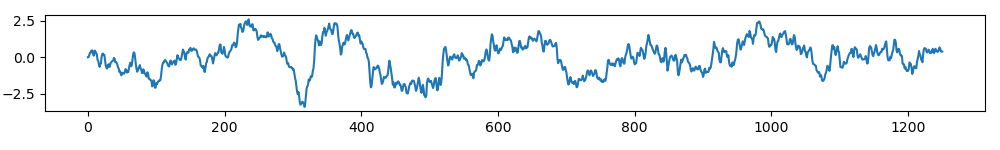

In [45]:
plt.figure(figsize=(10, 1.5)); ax=plt.subplot(111)
plt.plot(tms_norm_orig[0, e, :])
plt.tight_layout()